In [1]:
import openai
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from googlesearch import search
from docx import Document

import re
import requests
import nltk
import spacy

In [2]:
%cd ..

with open('private.txt', 'r') as f:
    content = f.read()
    key = re.findall(r'\'.*?\'', content)[0].strip('\'')
    openai.api_key = key
f.close()

%cd experiment    

h:\Andere Computer\Mein Computer\GoogleDrive\Beruf\Freelancing\Code_Repo\NLP_Text_Generation_Webapp
h:\Andere Computer\Mein Computer\GoogleDrive\Beruf\Freelancing\Code_Repo\NLP_Text_Generation_Webapp\experiment


# Define Keywords

In [3]:
# define key words
keywords = ['Finanzielle Hilfe im Alter', 
            'Rentner in Not',
            'Armut Senioren',
            'Altersarmut Frauen',
            'Renten Pay-Gap',
            'Unterstützung Rentner']

# Generate Topic List 

## Generate Topics from Latest Article Headlines Found by Google Search

In [4]:
# Query google keyword by keyword
titles_google = []
source_google = []

for kw in keywords:
  query = kw
  for url in search(query, num_results=10, lang="de"):
      # print url
      print(url)
      # print article titles
      html_string = requests.get(url).content
      try:
        title = re.search(b'<title>(.*?)</title>', html_string).group(1)
        title = title.decode('utf-8')
        title = title.split('.')[0].split('&')[0].split('|')[0].split('-')[0]
        print(title)
        titles_google.append(title)
        source_google.append(url)
      except:
        print('Retrieving the title not feasible.')

https://familienportal.de/familienportal/lebenslagen/alter/staatliche-leistungen
Staatliche Leistungen im Alter 
https://www.caritas.de/hilfeundberatung/ratgeber/alter/pflege/finanzielle-hilfe-wenn-die-rente-nicht-reicht
Finanzielle Hilfe wenn die Rente nicht reicht
https://www.deutsche-rentenversicherung.de/DRV/DE/Rente/In-der-Rente/Grundsicherung/grundsicherung_node.html
Grundsicherung 
https://www.kennstdueinen.de/magazin/geldnot-im-alter-welche-finanziellen-hilfen-gibt-es-wenn-die-rente-nicht-reicht/
Geldnot im Alter 
https://www.seniorenlebenshilfe.de/dienstleistungen-fuer-senioren/grundsicherung-im-alter/
Wichtige Infos zur Grundsicherung im Alter 
https://www.focus.de/finanzen/altersvorsorge/staatliche-unterstuetzung-viel-mehr-geld-im-alter-sieben-lohnende-zuschuesse-fuer-rentner_id_8970984.html
Viel mehr Geld im Alter: Sechs lohnende Zuschüsse für Rentner 
https://www.einherzfuerrentner.de/fuer-rentner/
Für Rentner 
https://www.serviceportal-zuhause-im-alter.de/wohnen/laenger-z

In [5]:
# turn titles and sources into dataframe
df_titles_google = pd.DataFrame({'source': source_google, 'title': titles_google})
df_titles_google.head(10)

,source,title
0,https://familienportal.de/familienportal/leben...,Staatliche Leistungen im Alter
1,https://www.caritas.de/hilfeundberatung/ratgeb...,Finanzielle Hilfe wenn die Rente nicht reicht
2,https://www.deutsche-rentenversicherung.de/DRV...,Grundsicherung
3,https://www.kennstdueinen.de/magazin/geldnot-i...,Geldnot im Alter
4,https://www.seniorenlebenshilfe.de/dienstleist...,Wichtige Infos zur Grundsicherung im Alter
5,https://www.focus.de/finanzen/altersvorsorge/s...,Viel mehr Geld im Alter: Sechs lohnende Zuschü...
6,https://www.einherzfuerrentner.de/fuer-rentner/,Für Rentner
7,https://www.serviceportal-zuhause-im-alter.de/...,Finanzielle Förderung
8,https://www.ihre-vorsorge.de/magazin/lesen/wen...,Wenn das Geld im Alter nicht reicht: Finanziel...
9,https://seniorenhilfe-lichtblick.de/,LichtBlick Seniorenhilfe e


## Generate Topics Based on ChatGPT

In [6]:
instruction = \
"Nenne zu folgenden Keywords " + '\n' \
'keywords = ' + str(keywords)  + '\n' \
'20 Themenüberschriften.'
print('Instruction: ', instruction)

Instruction:  Nenne zu folgenden Keywords 
keywords = ['Finanzielle Hilfe im Alter', 'Rentner in Not', 'Armut Senioren', 'Altersarmut Frauen', 'Renten Pay-Gap', 'Unterstützung Rentner']
20 Themenüberschriften.


In [7]:
response = openai.Completion.create(
    engine="text-davinci-003",
    prompt=instruction,
    temperature=.5,
    max_tokens=1000,
    top_p=1,
    n=2,
    presence_penalty=.5,
    frequency_penalty=.5,
)

titles_chatgpt = response['choices'][0].text

# format titles and put into list
titles_chatgpt = [title.strip().replace("\n", "").replace(". ", "") for title in re.split(r'\d+', titles_chatgpt)]

In [8]:
# turn titles and sources into dataframe
df_titles_chatgpt = pd.DataFrame({'source': 'chatgpt', 'title': titles_chatgpt})
df_titles_chatgpt.head(10)

,source,title
0,chatgpt,
1,chatgpt,Wie können Rentner in Not finanziell unterstüt...
2,chatgpt,Ein Blick auf die Altersarmut bei Frauen
3,chatgpt,Hilfe für Senioren in prekären Situationen
4,chatgpt,Finanzielle Unterstützung im Alter – was gibt es?
5,chatgpt,Auswirkungen des Renten Pay-Gaps auf ältere Me...
6,chatgpt,Armut im Alter – ein zunehmendes Problem
7,chatgpt,Eine Brücke bauen: Unterstützung für Rentner
8,chatgpt,Die Auswirkungen der Altersarmut auf Frauen
9,chatgpt,"Was ist der beste Weg, um Rentner in Not zu he..."


In [9]:
# concat both title dataframes
df_titles = df_titles_google.append(df_titles_chatgpt)
df_titles

C:\Users\Sebas\AppData\Local\Temp\ipykernel_9468\473715585.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_titles = df_titles_google.append(df_titles_chatgpt)


,source,title
0,https://familienportal.de/familienportal/leben...,Staatliche Leistungen im Alter
1,https://www.caritas.de/hilfeundberatung/ratgeb...,Finanzielle Hilfe wenn die Rente nicht reicht
2,https://www.deutsche-rentenversicherung.de/DRV...,Grundsicherung
3,https://www.kennstdueinen.de/magazin/geldnot-i...,Geldnot im Alter
4,https://www.seniorenlebenshilfe.de/dienstleist...,Wichtige Infos zur Grundsicherung im Alter
...,...,...
16,chatgpt,Ist eine angemessene Unterstützung von Rentner...
17,chatgpt,"Wie kann man verhindern, dass Senioren in Armu..."
18,chatgpt,Der Kampf gegen den Renten Pay-Gap – welche St...
19,chatgpt,Förderprogramme für ältere Menschen: Was steck...


## Apply Topic-Keyword Similarity Filter

In [10]:
nlp = spacy.load("de_core_news_lg")

In [11]:
# measure similarity between the titles and the keywords
title_keyword_similarity = []
for title in df_titles['title']:
  sim_score = 0
  for kw in keywords:
    sim_score += nlp(title).similarity(nlp(kw))
  # append sum of similarity scores
  title_keyword_similarity.append(np.round(sim_score, 2))

C:\Users\Sebas\AppData\Local\Temp\ipykernel_9468\706663355.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sim_score += nlp(title).similarity(nlp(kw))


In [12]:
# Add title-keyword similarity scores to df_titles
df_titles['keyword_similarity'] = title_keyword_similarity
df_titles.head()

,source,title,keyword_similarity
0,https://familienportal.de/familienportal/leben...,Staatliche Leistungen im Alter,2.42
1,https://www.caritas.de/hilfeundberatung/ratgeb...,Finanzielle Hilfe wenn die Rente nicht reicht,2.43
2,https://www.deutsche-rentenversicherung.de/DRV...,Grundsicherung,2.60
3,https://www.kennstdueinen.de/magazin/geldnot-i...,Geldnot im Alter,2.01
4,https://www.seniorenlebenshilfe.de/dienstleist...,Wichtige Infos zur Grundsicherung im Alter,1.82


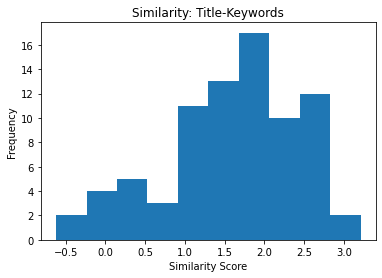

In [13]:
# show title-similarity distribution
plt.hist(df_titles['keyword_similarity'])
plt.title('Similarity: Title-Keywords')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

In [14]:
# filter out similarity score < 0.9
df_titles = df_titles[df_titles['keyword_similarity'] > 0.9]
df_titles = df_titles.sort_values(by='keyword_similarity', ascending=False, ignore_index=True)
df_titles

,source,title,keyword_similarity
0,https://www.bpb.de/kurz-knapp/zahlen-und-fakte...,Altersarmut,3.21
1,https://www.deutschlandfunkkultur.de/altersarm...,Altersarmut,3.21
2,chatgpt,Hilfe für Senioren in prekären Situationen,2.81
3,https://www.wn.de/muenster/immer-mehr-rentner-...,Immer mehr Rentner in Not,2.77
4,https://frauen.verdi.de/themen/rente/++co++c0b...,Frauen haben niedrigere Renten – ver,2.75
...,...,...,...
60,https://taz.de/Weibliche-Altersarmut/!5906230/,Weibliche Altersarmut: Mehr Geld für Frauen!,1.14
61,https://www.dza.de/detailansicht/im-arbeitsleb...,Im Arbeitsleben und im Ruhestand: gravierende ...,1.07
62,https://www.malteser.de/dabei/information-tipp...,Altersarmut in Deutschland: Ein Überblick,1.04
63,chatgpt,Förderprogramme für ältere Menschen: Was steck...,1.00


## Save Topic Ideation as Word Document

In [15]:
# create a word document 
document = Document()

# add table to document
table = document.add_table(rows=1, cols=3)
table.style = 'Table Grid'

# add table header
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Source'
hdr_cells[1].text = 'Title'
hdr_cells[2].text = 'Keyword Similarity'

# add data to table
for i in range(len(df_titles)):
    row_cells = table.add_row().cells
    row_cells[0].text = df_titles.iloc[i]['source']
    row_cells[1].text = df_titles.iloc[i]['title']
    row_cells[2].text = str(df_titles.iloc[i]['keyword_similarity'])

# save word document
document.save('topic_ideation.docx')

# Advise ChatGPT to Write Article for Given Topic

In [16]:
topic = df_titles['title'][2]
print(topic)

Hilfe für Senioren in prekären Situationen


In [17]:
instruction = "\n" + \
"Schreibe einen Artikel von 250 Wörtern zum Thema: \n" + \
topic + '. \n' + \
"Der Artikel soll die Schlüsselbegriffe " + '\n' + \
str(keywords) + '\n' + \
"enthalten." + '\n' + \
"Desweiteren soll der Artikel in Absätze und Überschriften unterteilt sein." + '\n' + \
"Desweiteren sollen die Überschriften die Schlüsselbegriffe enthalten."

print('Instruction: ', instruction)

Instruction:  
Schreibe einen Artikel von 250 Wörtern zum Thema: 
Hilfe für Senioren in prekären Situationen. 
Der Artikel soll die Schlüsselbegriffe 
['Finanzielle Hilfe im Alter', 'Rentner in Not', 'Armut Senioren', 'Altersarmut Frauen', 'Renten Pay-Gap', 'Unterstützung Rentner']
enthalten.
Desweiteren soll der Artikel in Absätze und Überschriften unterteilt sein.
Desweiteren sollen die Überschriften die Schlüsselbegriffe enthalten.


In [18]:
response = openai.Completion.create(
    engine="text-davinci-003",
    prompt=instruction,
    temperature=.5,
    max_tokens=1000,
    top_p=1,
    n=2,
    presence_penalty=.5,
    frequency_penalty=.5,
)

text_seo = response['choices'][0].text

In [19]:
print(text_seo)



Hilfe für Senioren in prekären Situationen
In Deutschland gibt es viele Senioren, die aufgrund von Altersarmut und Renten Pay-Gap in einer prekären Situation sind. Um dieser Armut entgegenzuwirken, gibt es verschiedene Möglichkeiten, finanzielle Hilfe zu erhalten. 

Finanzielle Hilfe im Alter
--------------------------
Um Rentnern in Not zu helfen, hat der Staat verschiedene Programme eingeführt. Eine Möglichkeit ist die Grundsicherung im Alter. Diese stellt ein Grundeinkommen dar, das an ältere Menschen gezahlt wird, die nicht mehr in der Lage sind, ihren Lebensunterhalt zu bestreiten. Darüber hinaus können Seniorinnen und Senioren auch Sozialhilfe beantragen oder Zuschüsse für Wohnraum erhalten. 

Armut Senioren: Frauen besonders betroffen 
-----------------------------------------
Auch wenn Senioren insgesamt am stärksten von Armut betroffen sind, leiden vor allem Frauen unter Altersarmut. Dies liegt unter anderem an den geringeren Einkommensmöglichkeiten sowie dem höheren Anteil 

## Save SEO Text as Word Document

In [20]:
# Create a new document object.
document = Document()

# Create a new paragraph object.
paragraph = document.add_paragraph()

# Write the string to the paragraph object.
paragraph.add_run(text_seo)

# Save the document.
document.save('seo_text.docx')

# ToDo

- Save Topic List and hand over to Alexa -> warte auf Feedback
- Include Keywords into article generation -> ok
- correct topic titles
- code review: make functions
- develop streamlit app